In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


class AutoEncoder(tf.keras.Model):
    def __init__(self, input_shape=(28, 28, 1)):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=input_shape),
                tf.keras.layers.Conv2D(
                    16, (3, 3), activation="relu", padding="same", strides=2
                ),
                tf.keras.layers.Conv2D(
                    8, (3, 3), activation="relu", padding="same", strides=2
                ),
            ]
        )
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.Conv2DTranspose(
                    8, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2DTranspose(
                    16, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2D(
                    1, kernel_size=(3, 3), activation="sigmoid", padding="same"
                ),
            ]
        )

    def decode(self, x):
        return self.decoder(x)

    def encode(self, x):
        return self.encoder(x)

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()

In [2]:
def plot_reconstructed_images_and_encodings(original, encodings, reconstructed):
    n = original.shape[0]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Original Images", loc="left", fontsize=20)
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(encodings[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Encodings", loc="left", fontsize=20)
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(reconstructed[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Reconstructed Images", loc="left", fontsize=20)
    plt.show()

In [3]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9
fashion_mnist = tf.keras.datasets.fashion_mnist  # 28x28 images of clothing items

(x_train1, y_train), (x_test1, y_test) = mnist.load_data()
x_train1 = x_train1 / 255.0  # normalize pixel values to be between 0 and 1
x_test1 = x_test1 / 255.0

In [4]:
model1 = AutoEncoder()
model1.compile(optimizer="adam", loss="mse")
model1.fit(
    x_train1, x_train1, epochs=10, shuffle=True, validation_data=(x_test1, x_test1)
)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0108 - val_loss: 0.0021
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0010 - val_loss: 8.9633e-04
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 8.1910e-04 - val_loss: 7.4407e-04
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7.2614e-04 - val_loss: 7.1064e-04
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 6.8747e-04 - val_loss: 6.6086e-04
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 6.6430e-04 - val_loss: 6.3991e-04
Epoch 10/10
1875/1875 [==============

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                      

1/1 [==============================] - 0s 217ms/step


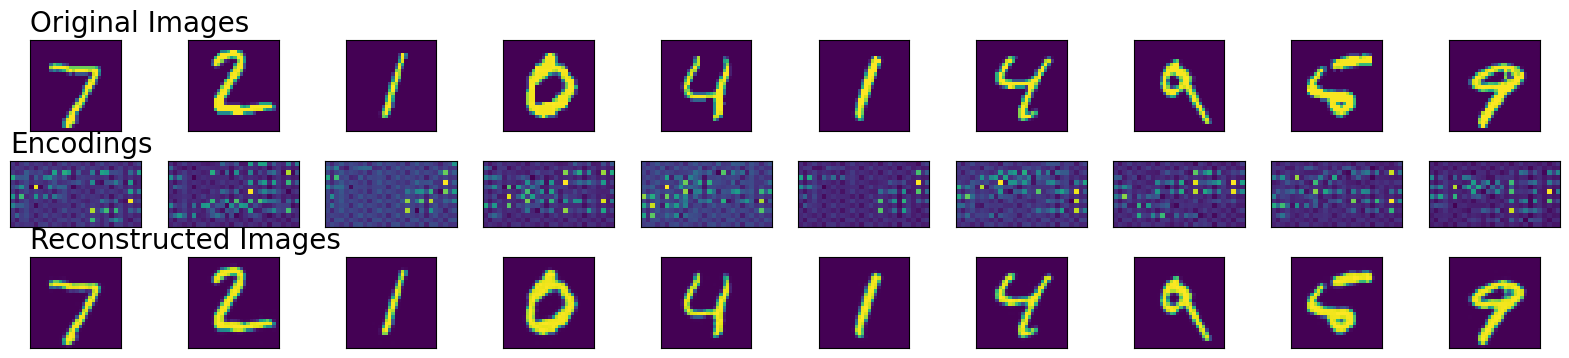

In [6]:
plot_reconstructed_images_and_encodings(
    x_test1[:10],
    tf.reshape(model1.encode(x_test1[:10]), (10, 14, -1)),
    model1.predict(x_test1[:10]),
)

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0  # normalize pixel values to be between 0 and 1
x_test = x_test / 255.0
model2 = AutoEncoder(input_shape=(28, 28, 1))
model2.compile(optimizer="adam", loss="mse")
model2.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0128 - val_loss: 0.0047
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [8]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                    

1/1 [==============================] - 0s 140ms/step


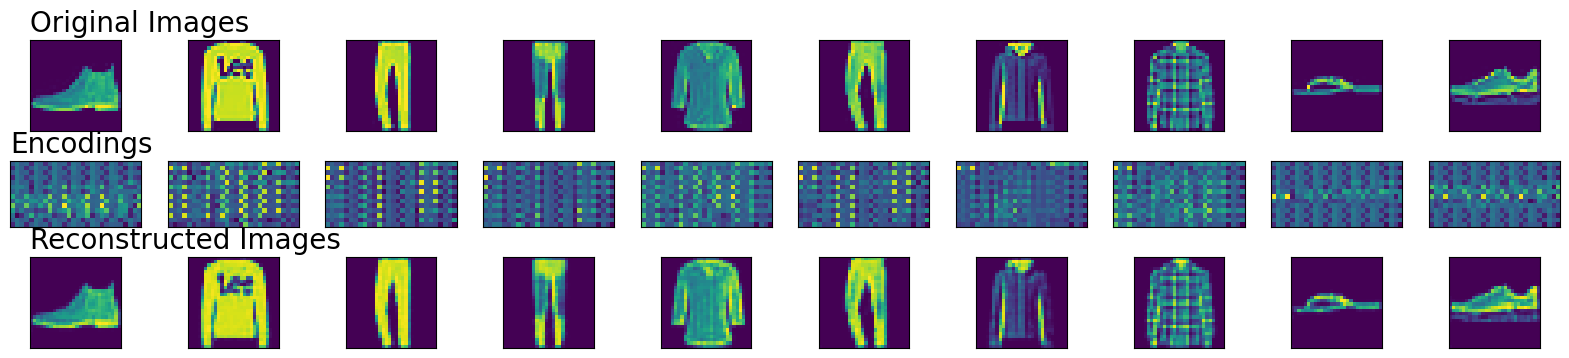

In [9]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model2.encode(x_test[:10]), (10, 14, -1)),
    model2.predict(x_test[:10]),
)

1/1 [==============================] - 0s 29ms/step


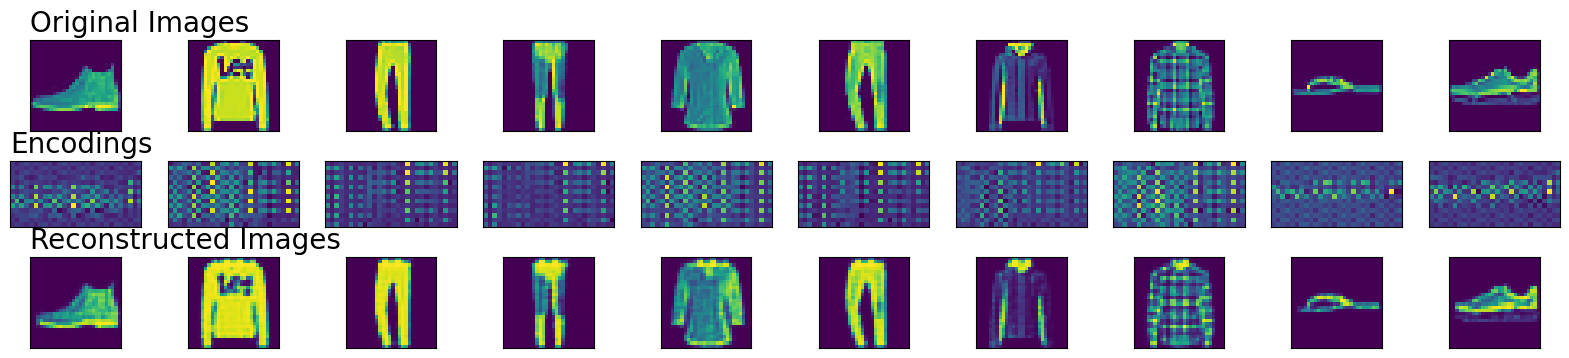

In [10]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model1.encode(x_test[:10]), (10, 14, -1)),
    model1.predict(x_test[:10]),
)

In [11]:
model1.evaluate(x_test, x_test)  # digit model on fashion data

313/313 [==============================] - 1s 4ms/step - loss: 0.0075


0.007481385488063097

In [12]:
model2.evaluate(x_test1, x_test1)  # fashion model on digit data

313/313 [==============================] - 1s 4ms/step - loss: 0.0012


0.0012150149559602141

In [13]:
def noisify(image, noise_type, noise_factor=0.2):
    implemented_noise = {"static", "b&p"}
    if noise_type not in implemented_noise:
        raise ValueError("results: noise_type must be one of %r." % valid)
    if noise_type == "static":
        noisy_image = image + noise_factor * np.random.normal(
            loc=0.0, scale=1.0, size=image.shape
        )
        return np.clip(noisy_image, 0.0, 1.0)
    elif noise_type == "b&p":
        noisy_image = image.copy()
        rdn = np.random.random(size=noisy_image.shape)
        apply_noise = rdn < noise_factor
        noisy_image[apply_noise] = 1 - noisy_image[apply_noise]
        return noisy_image

1/1 [==============================] - 0s 27ms/step


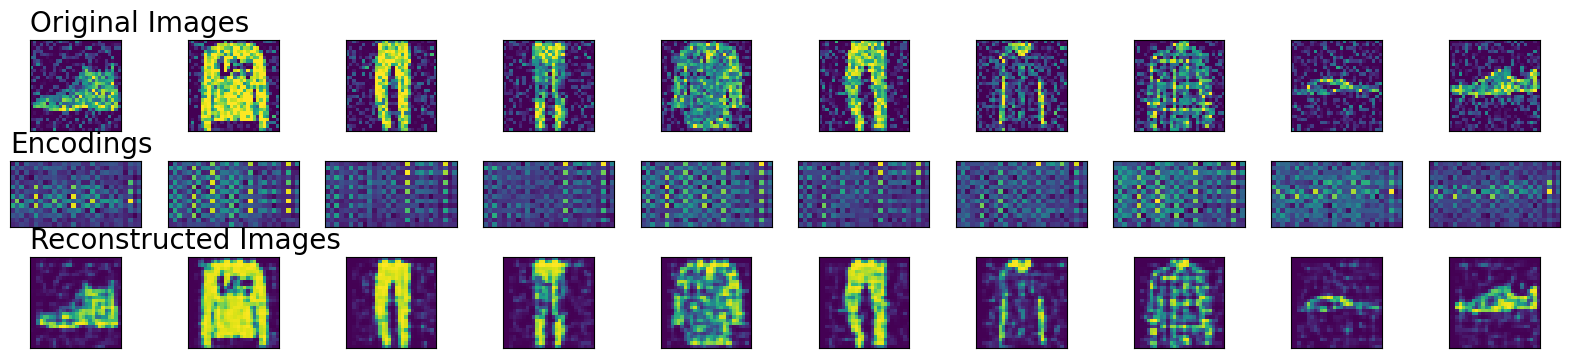

In [14]:
plot_reconstructed_images_and_encodings(
    noisified_x_test := noisify(x_test[:10], "static"),
    tf.reshape(model1.encode(noisified_x_test[:10]), (10, 14, -1)),
    model1.predict(noisified_x_test[:10]),
)

1/1 [==============================] - 0s 32ms/step


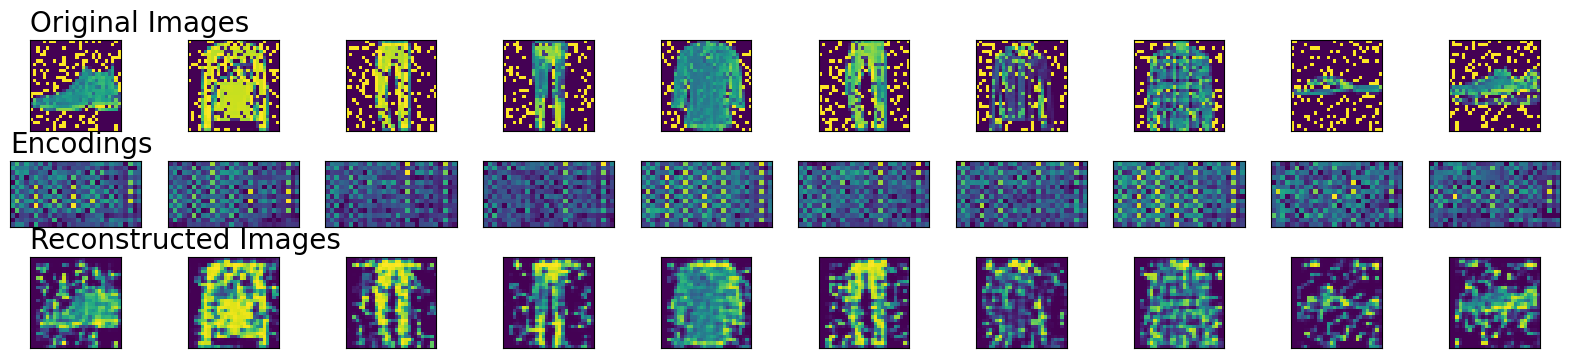

In [15]:
plot_reconstructed_images_and_encodings(
    noisified_x_test := noisify(x_test[:10], "b&p"),
    tf.reshape(model1.encode(noisified_x_test[:10]), (10, 14, -1)),
    model1.predict(noisified_x_test[:10]),
)